In [1]:
import torch
from xsum_dataset import XSUMDataset
from datasets import load_dataset
from transformers import LlamaTokenizer
import matplotlib.pyplot as plt

/opt/homebrew/Caskroom/miniconda/base/envs/early-exits/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(torch.cuda.is_available())

False


In [3]:
tokenizer = LlamaTokenizer.from_pretrained("meta-llama/Llama-2-7b-chat-hf")
# dataset = load_dataset("EdinburghNLP/xsum", split="train", num_proc=8)
max_length = 4096


In [4]:
xsum = XSUMDataset(tokenizer, max_length=max_length, num_proc=8)

In [5]:
xsum[0]["input_ids"]

{'input_ids': tensor([    1,   450,  2989,  3438,   310, 18658,   297, 19017, 22389, 29892,
           697,   310,   278, 10161, 17322, 15201, 29892,   338,  1603,  1641,
          1223, 11517, 29889,    13,  5612,  1466,   664,   338,   373, 17696,
           297, 10875,   860,   322,  1784, 25320,   297,  3938,   774,  2222,
         14812,  3933, 28042, 15201,   491, 13407,  4094, 29889,    13,  5323,
          1144,   373,   278,  5833, 12180,  1667,  1220,  3700,   766, 18953,
          2861,   304, 18658,   472,   278, 12718,  4885, 10630,   328,  5313,
         29889,    13, 14804,  5381,   267,   322, 22329,   414,   892, 15201,
           491,  5685,  3689,   297, 19017, 22389,  1156,   278,  6163,   315,
           929, 11969,   287,   964,   278,  4726, 29889,    13,  6730,  7668,
         28432,   624,   332, 25339, 16669,   278,  4038,   304, 16096,   278,
         18658, 29889,    13,  1576, 19922,  2078,  3791,   263, 11551,   292,
         10090, 29892,  5685,  3689,  1

In [20]:
print(f"BOS ID: {tokenizer.bos_token_id}, EOS: {tokenizer.eos_token_id}, PAD: {tokenizer.pad_token}")

BOS ID: 1, EOS: 2, PAD: None


In [25]:
doc_text = dataset[0]["document"].strip()
sum_text = (" TL;DR: " + dataset[0]["summary"]).strip()
doc_encodings = tokenizer(
                    doc_text,
                    max_length=max_length,
                    truncation=True,
                    return_tensors="pt" # Pytorch tensors
                )

summary_encodings = tokenizer(
    sum_text,
    max_length=max_length,
    truncation=True,
    return_tensors="pt" # Pytorch tensors
)

Keyword arguments {'add_bos_token': True} not recognized.
Keyword arguments {'add_eos_token': True} not recognized.


In [24]:
doc_encodings["input_ids"].squeeze()

tensor([    1,   450,  2989,  3438,   310, 18658,   297, 19017, 22389, 29892,
          697,   310,   278, 10161, 17322, 15201, 29892,   338,  1603,  1641,
         1223, 11517, 29889,    13,  5612,  1466,   664,   338,   373, 17696,
          297, 10875,   860,   322,  1784, 25320,   297,  3938,   774,  2222,
        14812,  3933, 28042, 15201,   491, 13407,  4094, 29889,    13,  5323,
         1144,   373,   278,  5833, 12180,  1667,  1220,  3700,   766, 18953,
         2861,   304, 18658,   472,   278, 12718,  4885, 10630,   328,  5313,
        29889,    13, 14804,  5381,   267,   322, 22329,   414,   892, 15201,
          491,  5685,  3689,   297, 19017, 22389,  1156,   278,  6163,   315,
          929, 11969,   287,   964,   278,  4726, 29889,    13,  6730,  7668,
        28432,   624,   332, 25339, 16669,   278,  4038,   304, 16096,   278,
        18658, 29889,    13,  1576, 19922,  2078,  3791,   263, 11551,   292,
        10090, 29892,  5685,  3689,  1784, 12128,  4426,   373, 

In [9]:
lengths = []
for i in range(len(train_dataset)):
    lengths.append(train_dataset[i])


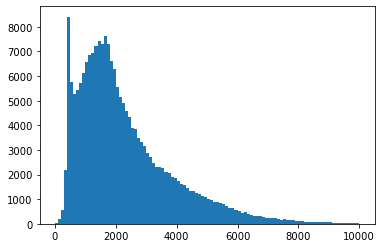

In [ ]:
plt.hist(lengths, bins=100, range=(0, 10000))
plt.show()

In [ ]:
count = 0
for num in lengths:
    if num > 4096:
        count += 1
print(count)
